In [1]:
from data_formatting import *
from architectures import *
from training import *
from evaluation import *
import torch
import os
import datetime
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
import pickle 
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np

Using device: cuda
Using device: cuda


In [ ]:
path_test = "D:\IR_blobs\IR_blobs_github\data_IR_final\social_distance\distance_test.csv"
path_train = "D:\IR_blobs\IR_blobs_github\data_IR_final\social_distance\distance_train.csv"

In [2]:
df_test = pd.read_csv(path_test)
df_train = pd.read_csv(path_train)

In [3]:
df_train


,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,Pixel 10,...,Pixel 57,Pixel 58,Pixel 59,Pixel 60,Pixel 61,Pixel 62,Pixel 63,Pixel 64,session,violations
0,16.60,16.85,16.93,16.65,17.01,17.02,16.34,16.67,16.09,16.08,...,15.75,15.36,15.59,15.82,15.72,16.26,15.87,15.83,0,0
1,16.52,16.77,16.79,16.60,17.07,17.13,16.60,16.60,15.95,16.28,...,15.75,15.34,15.65,15.63,15.68,16.12,16.10,15.77,0,0
2,16.63,16.69,16.69,16.52,17.02,17.23,16.72,16.59,16.05,16.32,...,15.68,15.27,15.66,15.39,15.67,16.22,16.35,15.55,0,0
3,16.73,16.73,16.80,16.57,17.00,17.31,16.81,16.71,16.07,16.39,...,15.54,15.25,15.54,15.41,15.67,16.31,16.47,15.51,0,0
4,16.88,16.75,16.82,16.71,16.93,17.26,16.89,16.74,16.08,16.28,...,15.38,15.45,15.57,15.48,15.80,16.39,16.36,15.70,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100434,16.84,16.95,17.31,17.65,17.98,17.68,17.12,17.16,16.29,16.59,...,15.43,15.69,15.78,16.04,16.15,16.44,16.50,15.83,299,3
100435,16.77,16.99,17.33,17.66,17.60,17.54,17.16,17.23,16.46,17.45,...,15.42,15.54,15.69,16.01,15.96,16.29,16.43,15.70,299,3
100436,16.75,17.06,17.20,17.40,17.45,17.44,17.10,17.25,16.69,18.09,...,15.21,15.57,15.54,15.93,15.86,16.12,16.29,15.27,299,3
100437,16.88,17.08,17.17,17.21,17.36,17.69,17.02,17.25,16.94,18.28,...,15.18,15.58,15.71,16.18,15.90,16.16,16.26,15.52,299,3


In [4]:
df_test

,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,Pixel 10,...,Pixel 57,Pixel 58,Pixel 59,Pixel 60,Pixel 61,Pixel 62,Pixel 63,Pixel 64,session,violations
0,17.21,17.14,16.87,16.80,17.07,17.34,17.05,17.30,16.43,16.52,...,16.36,16.16,15.76,16.04,15.77,16.05,15.80,15.01,0,0
1,17.24,17.03,16.90,16.82,17.14,17.34,16.88,17.19,16.29,16.57,...,16.67,16.30,15.88,16.21,15.82,15.95,15.56,14.93,0,0
2,17.05,16.94,16.85,16.77,17.36,17.40,16.84,17.11,16.32,16.52,...,16.60,16.52,16.51,16.30,15.70,15.79,15.52,15.05,0,0
3,16.88,16.92,17.10,16.75,17.40,17.54,16.77,17.15,16.46,16.70,...,16.25,16.63,17.50,16.59,15.67,16.02,15.70,15.27,0,0
4,16.91,16.85,16.95,16.68,17.41,17.51,16.82,17.23,16.55,16.74,...,15.92,16.53,18.23,17.12,15.80,16.20,15.67,15.32,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26368,16.80,16.86,16.96,17.21,17.21,17.32,16.93,17.30,16.77,17.61,...,15.41,15.53,15.76,16.56,16.74,16.58,16.24,15.37,82,3
26369,16.89,16.97,17.05,17.37,17.30,17.66,17.25,17.19,16.95,18.25,...,15.75,15.44,15.55,16.31,16.41,16.58,16.18,15.34,82,3
26370,16.91,16.99,17.14,17.47,17.46,18.40,17.71,17.11,16.79,18.25,...,15.95,15.55,15.57,16.13,16.15,16.52,16.30,15.40,82,3
26371,16.71,17.20,17.23,17.49,17.36,19.28,18.54,17.35,16.49,17.45,...,15.79,15.64,15.78,16.03,16.03,16.37,16.19,15.48,82,3


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
collection_train = prepare_data_distancing(df_train, interpolate = True)
collection_test = prepare_data_distancing(df_test, interpolate = True)

In [11]:
interpolate = True
path_to_save = "D:/IR_blobs/IR_blobs_github/models"

In [12]:
train_set, test_set = create_datasets(collection_train, collection_test)

In [13]:
#Set the main hyperprameter values
batch_size = 64
num_epochs = 200
std = 0.02
patience = 20
learning_rate = 0.001
class_number = 4
code_word = f"cnn_ir_bs{batch_size}__std{std}_lr{learning_rate}_pt{patience}"

In [14]:
train_loader = dataset_to_loader(train_set, batch_size, balancing = True, shuffle = True)
test_loader = dataset_to_loader(test_set, batch_size, balancing = False, shuffle = False)

In [ ]:
len(train_loader)

In [ ]:
len(test_loader)

In [15]:
model = CNN_IR_7by7_3fc(class_number = class_number)

In [16]:
# Calculate the number of parameters
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(total_params)

13588


In [17]:
#model =  CNN_IR_3by3(class_number = class_number)
#model.load_state_dict(torch.load('D:/IR_blobs/IR_blobs/models/model_4_covid_cnn_4900_bn_new_bs64_std002_3by3_run1'))

In [18]:
# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

CNN_IR_7by7_3fc(
  (conv1): Conv2d(1, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 8, kernel_size=(7, 7), stride=(1, 1), padding=(2, 2))
  (bn2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(8, 4, kernel_size=(5, 5), stride=(1, 1))
  (bn3): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(4, 4, kernel_size=(5, 5), stride=(1, 1))
  (bn4): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=144, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=4, bias=True)
)

In [19]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

In [20]:
model, loss_batch, loss_epoch = network_training(model, train_loader, optimizer, criterion, 
                                                 num_epochs, code_word, path_to_save, interpolate = True, patience=patience, add_noise = True, std = std)

current learning rate:0.001
Epoch 0: 0.641035852607055
Epoch 1: 0.8384292953932238
Epoch 2: 0.8808530550881629
Epoch 3: 0.9067891954320533
Epoch 4: 0.9195730742042434
Epoch 5: 0.9279463156741903
Epoch 6: 0.9358615677177192
Epoch 7: 0.9423232011469648
Epoch 8: 0.9464451059847271
Epoch 9: 0.9487549657005745
Epoch 10: 0.9527573950357928
Epoch 11: 0.9546889156602515
Epoch 12: 0.957168032338036
Epoch 13: 0.9598462748533936
Epoch 14: 0.9596670615995778
Epoch 15: 0.962444867033722
Epoch 16: 0.9640976114855783
Epoch 17: 0.9663477334501538
Epoch 18: 0.9667061599577853
Epoch 19: 0.967432969264927
Epoch 20: 0.9693445773056283
Epoch 21: 0.9701211680721632
Epoch 22: 0.9697726978564104
Epoch 23: 0.9717838688158982
Epoch 24: 0.972590328458069
Epoch 25: 0.973655651689085
Epoch 26: 0.9742928543693187
Epoch 27: 0.97531835243282
Epoch 28: 0.9755075219785143
Epoch 29: 0.9749897948008244
Epoch 30: 0.9768416650902538
Epoch 31: 0.9774888240623663
Epoch 32: 0.9770607035115841
Epoch 33: 0.9776182558567887
Epoc

- accuracy: 96.26 %
- misclassification: 3.74 %
- average class accuracy: 92.15388 %
Class 0 Accuracy: 0.98
Class 1 Accuracy: 0.96
Class 2 Accuracy: 0.88
Class 3 Accuracy: 0.87


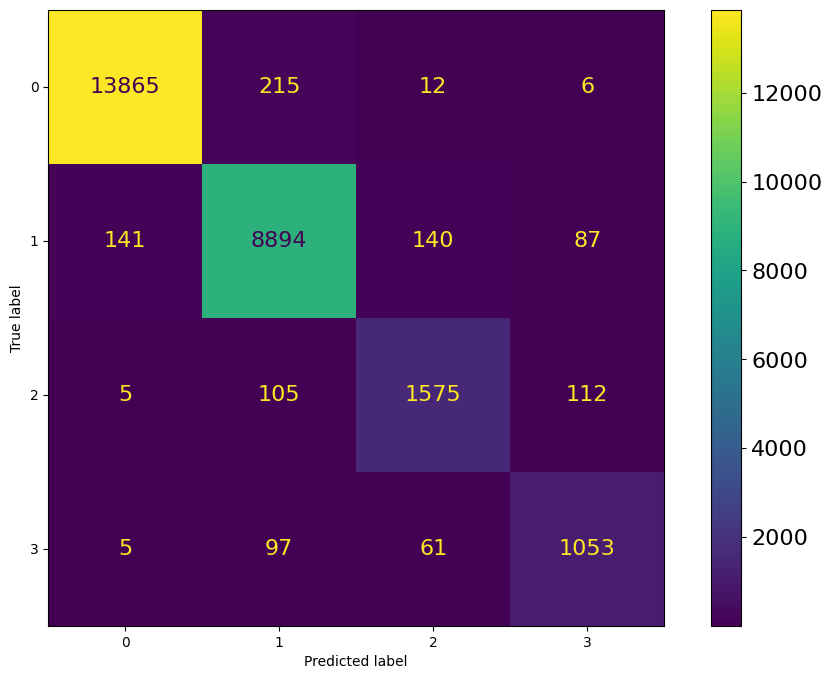

- average PR-AUC: 0.8927973436017149


In [21]:
correctly_classified, average_class_accuracy, pr_auc, labels, predictions, misclassified_samples = evaluation_of_net_new(model, test_loader, class_number)

- accuracy: 98.82 %
- misclassification: 1.18 %
- average class accuracy: 98.82412 %
Class 0 Accuracy: 0.99
Class 1 Accuracy: 0.98
Class 2 Accuracy: 0.99
Class 3 Accuracy: 0.99


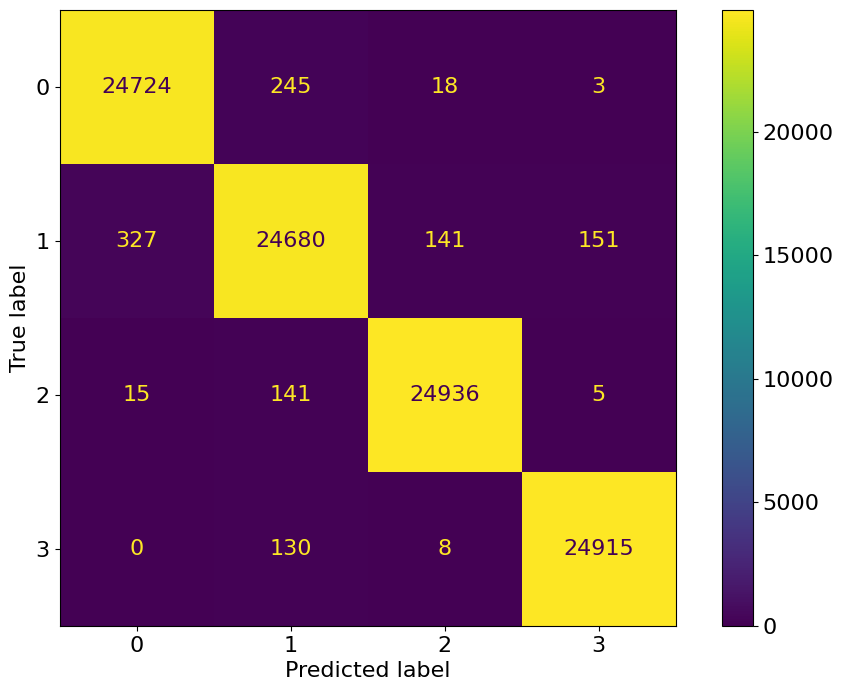

- average PR-AUC: 0.9703846216932758


In [22]:
 # Evaluating the model 4 class for covid on the test set
correctly_classified, weighted_accuracy, pr_auc, labels, predictions, misclassified_samples = evaluation_of_net_new(model, train_loader, class_number)

#bs16_200epochs_int:
Train:
- accuracy: 98.20 %
- misclassification: 1.80 %
- average class accuracy: 97.01033 %
- average PR-AUC: 0.9738325479361423
Class 0 Accuracy: 0.99
Class 1 Accuracy: 0.98
Class 2 Accuracy: 0.97
Class 3 Accuracy: 0.94



Test:
- accuracy: 95.19 %
- misclassification: 4.81 %
- average class accuracy: 87.25222 %
Class 0 Accuracy: 0.98
Class 1 Accuracy: 0.97
Class 2 Accuracy: 0.82
Class 3 Accuracy: 0.73
- average PR-AUC: 0.8887581480353492

#bs64 _200epochs_int: 
Train:
- accuracy: 99.22 %
- misclassification: 0.78 %
- average class accuracy: 98.66636 %
- Class 0 Accuracy: 1.00
- Class 1 Accuracy: 0.99
- Class 2 Accuracy: 0.99
- Class 3 Accuracy: 0.97

Test:
- accuracy: 94.99 %
- misclassification: 5.01 %
- average class accuracy: 85.66976 %
- Class 0 Accuracy: 0.98
- Class 1 Accuracy: 0.97
- Class 2 Accuracy: 0.77
- Class 3 Accuracy: 0.70

#bs32_200epochs_small_kernel_3600param
Train:
- accuracy: 98.18 %
- misclassification: 1.82 %
- average class accuracy: 96.31482 %
- Class 0 Accuracy: 0.99
- Class 1 Accuracy: 0.98
- Class 2 Accuracy: 0.96
- Class 3 Accuracy: 0.92
Test:
- accuracy: 93.36 %
- misclassification: 6.64 %
- average class accuracy: 80.62636 %
- Class 0 Accuracy: 0.98
- Class 1 Accuracy: 0.96
- Class 2 Accuracy: 0.74
- Class 3 Accuracy: 0.55

#bs32_200epochs_small_kernel_11000param- two times as many filters +100
Train:
- accuracy: 99.69 %
- misclassification: 0.31 %
- average class accuracy: 99.51522 %
- Class 0 Accuracy: 1.00
- Class 1 Accuracy: 1.00
- Class 2 Accuracy: 0.99
- Class 3 Accuracy: 0.99
Test:
- accuracy: 95.29 %
- misclassification: 4.71 %
- average class accuracy: 85.29157 %
- Class 0 Accuracy: 0.99
- Class 1 Accuracy: 0.97
- Class 2 Accuracy: 0.80
- Class 3 Accuracy: 0.65

2ndrun_+100 epochs:
- accuracy: 95.45 %
- misclassification: 4.55 %
- average class accuracy: 86.81893 %
- Class 0 Accuracy: 0.98
- Class 1 Accuracy: 0.97
- Class 2 Accuracy: 0.81
- Class 3 Accuracy: 0.71

In [ ]:
### CNN small 11000, bs 32, 

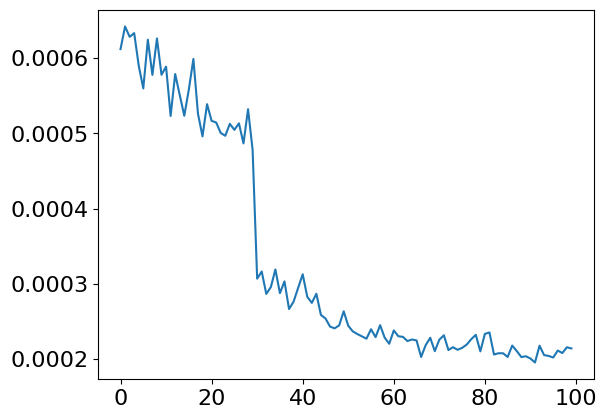

In [29]:
plt.plot(loss_epoch)

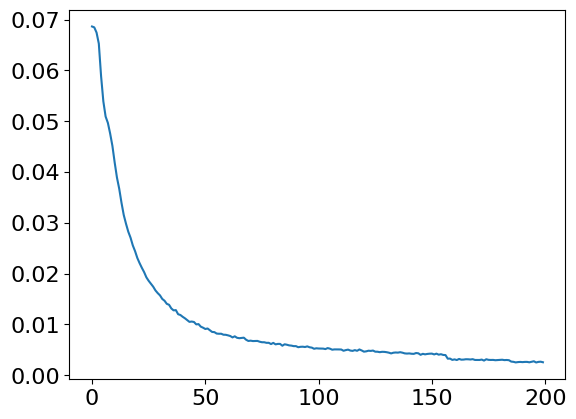

In [21]:
plt.plot(loss_epoch)

In [22]:
with open(f'D:/IR_blobs/IR_blobs/losses/loss_CNN_covid_int_bs16_200epoch.pkl', 'wb') as f:
    pickle.dump(loss_epoch, f)

In [17]:
from training_evaluation import *

In [19]:
visualize_misclassified(misclassified_samples, interpolate=interpolate)

ValueError: too many values to unpack (expected 2)

In [18]:
#Visualizing misclassified samples and saving them with timestamp
#timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
visualize_misclassified(misclassified_samples, interpolate=interpolate)
#for i, sample in enumerate(misclassified_samples):
#    plt.savefig(f'misclass_{code_word}_{i}_{timestamp}.png')

ValueError: too many values to unpack (expected 2)

In [18]:
#Visualization:

In [20]:
model

CNN_int(
  (conv1): Conv2d(1, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (conv2): Conv2d(16, 8, kernel_size=(7, 7), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(8, 4, kernel_size=(6, 6), stride=(1, 1))
  (conv4): Conv2d(4, 2, kernel_size=(4, 4), stride=(1, 1))
  (fc1): Linear(in_features=72, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=4, bias=True)
)